<a href="https://colab.research.google.com/github/FenosoaRandrianjatovo/perceptron/blob/master/Fenosoa_Randrianjatovo_Perceptron_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please make a copy of the notebook before you start updating it.

# Import libraries and load the data from sklearn dataset

In [211]:
 ### Import packages

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [212]:
### Import datasets from sklearn.datasets
data = load_iris()

In [ ]:
#### Target 

target = data.target

In [213]:
### Count the number of uniques values

N_= np.unique(target)


In [214]:
print('the unique values in the targets are', N_)

the unique values in the targets are [0 1 2]


In [215]:
target.shape

(150,)

## Remove the class 2 in our dataset in order to have a binary classification problem

In [216]:
##############
a=target.copy()
y = np.delete(a,np.where(a == 2))
#######


# y=target[target !=2]
# y

In [217]:
y.shape

(100,)

In [218]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Replace all 0 in the target by -1 using numpy

In [219]:
#############
y[y==0]=-1
###########
# y=np.where(y==0,-1,y)

In [220]:
### Inputs values
Inputs = data.data

In [221]:
Inputs.shape

(150, 4)

## Let's remove the last 50 rows in the inputs data (they belong to the class 2)

In [222]:
#### New Input
X = Inputs[:100,:]

In [223]:
X.shape

(100, 4)

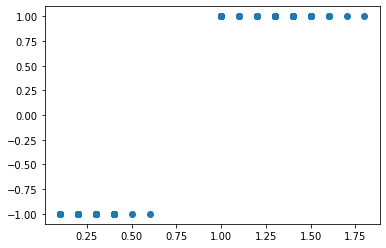

In [224]:
plt.scatter(X[:, 3], y)

## Combines the dataset and Shuffle them using numpy

In [225]:

### Combines the input X and the target z

data_combine=np.c_[X,y]
data_combine
## shuffle the data
np.random.shuffle(data_combine)


## Split the data into (X_train, Y_train), (X_test, Y_test):  80% for training and 20% for test

In [226]:
#########
def Split(data,train_size=0.8):
  
  train=int(len(data)*train_size)
  
  X_train=data[:train,:-1]
  Y_train=data[:train,-1]
  X_test=data[train:,:-1]
  Y_test=data[train:,-1]

  return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test=Split(data_combine,train_size=0.8)
###########

In [227]:
print(X_train.shape)

(80, 4)


In [228]:
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(80,)
(20, 4)
(20,)


## Implement the class Perceptron

$ŷ[i] = Θ^TX[i]$

if  $y[i]*np.sign(ŷ[i]) <= 0$:

        update Θ: Θ = Θ + y[i]*X[i]
else:

      Θ = Θ

## For prediction: 

np.sign(X @ Θ)

In [240]:
class perceptron:
  def __init__(self, X, Y,theta,iter_= 100):
    self.X = X
    self.y = Y
    self.iter_ = iter_
    self.theta = theta
      
      
  def train(self):
    #loop over the number of iteration and the number of example
    X=self.X.reshape(-1,1)
    y=self.y.reshape(-1,1)
    # self.theta=self.theta.reshape(-1,1)
    epoch=0
    while True:

      for i in range(len(self.X)):

        y_hate=self.theta.T@self.X[i]
        # return self.y[i]*self.X[i]
        # print(y_hate)
        # print( np.sign(y_hate)*self.y[i]<=0)
        # return  self.theta+(self.y[i]*self.X[i].reshape(-1,1))

        if np.sign(y_hate)*self.y[i]<=0:
          self.theta=self.theta+self.y[i]*self.X[i]

      if epoch>self.iter_:
        break

      epoch+=1
    


      # compute the output of the model and update theta if necessary
      
  
  def predict(self,X):
    
    return np.sign(X@self.theta)
      
  
  def accuracy(self,X,Y):
    accuracy=0
    y_pred=self.predict(X)
    for i in range(len(X)):
      if y_pred[i]==Y[i]:
        accuracy+=1

    return 100*(accuracy/len(X))


      ## number of correctly predicted examples * 100
      
            

In [250]:
Perceptron = perceptron(X_train, Y_train,theta= np.random.rand(4)*1e-4, iter_= 100)
Perceptron.train()

In [245]:
y_pred=Perceptron.predict(X_test)
Perceptron.accuracy(X_test, Y_test)


array([-1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.])

In [248]:
Perceptron.accuracy(X_test, Y_test)

100.0

In [251]:
Perceptron = perceptron(X_train, Y_train, np.random.rand(4)*1e-4)

In [252]:
Perceptron.train()

In [254]:
Perceptron.predict(X_test)

array([-1.,  1., -1.,  1., -1., -1., -1.,  1.,  1.,  1., -1., -1., -1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.])

In [255]:
Perceptron.accuracy(X_test, Y_test)

100.0

In [256]:
np.sum(Y_test==Perceptron.predict(X_test))

20